# StarryNight

## Team Members
- 902011, Moleri Andrea, a.moleri@campus.unimib.it
- 856114, Costantini Davide, d.costantini6@campus.unimib.it
- 865939, Armani Filippo, f.armani1@campus.unimib.it

## Description of the Reference Domain and Objectives
The StarryNight project aims to construct a star classification system utilizing machine learning techniques acquired during the course of the Machine Learning curriculum. The primary objective is to demonstrate that stars adhere to a discernible pattern, specifically referred to as the Hertzsprung-Russell Diagram or HR-Diagram. This diagram serves as the basis for classifying stars by plotting their features, providing valuable insights into their characteristics.

## Design Choices for Dataset Creation, Hypotheses, and Assumptions

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F3791628%2Ffe9436bf4e2d23b5b18fb3db1f1fcbcb%2FHRDiagram.png?generation=1597348809674507&alt=media" width="350">

In crafting the dataset, we assume that stars exhibit identifiable patterns in their features, allowing for meaningful classification. The HR-Diagram will be employed as the guiding framework for the classification system. The dataset will encompass a range of features crucial for classification:

- **Absolute Temperature**: the absolute temperature of a celestial body, denoted by the symbol $T$, is measured in Kelvin $(K)$. It represents the temperature of the body on the Kelvin scale, an absolute temperature scale where $0K$ corresponds to absolute zero, the theoretical lowest temperature possible. Absolute temperature is a fundamental parameter in astrophysics and is crucial for understanding the thermodynamic characteristics of celestial objects.

- **Relative Luminosity**: relative luminosity, expressed as $L/L_o$, denotes the ratio of a celestial body's luminosity $(L)$ to the solar luminosity $(L_o)$. Luminosity is the total amount of energy radiated by the object per unit time. This dimensionless quantity provides insights into the intrinsic brightness of a celestial body relative to the Sun, serving as a key metric for comparative stellar analyses.

- **Relative Radius**: the relative radius, denoted by $R/R_o$, represents the ratio of a celestial body's radius $(R)$ to the solar radius $(R_o)$. This dimensionless parameter is essential in characterizing the size of celestial bodies, facilitating the comparison of their physical dimensions relative to the Sun, which serves as a standard reference.

- **Absolute Magnitude**: absolute magnitude $(M_v)$ is a measure of the intrinsic brightness of a celestial object as it would appear if placed at a standard distance of 10 parsecs from an observer. This parameter is defined on the logarithmic scale, and its determination involves corrections for both distance and interstellar extinction. Absolute magnitude enables astronomers to assess the true luminosity of celestial bodies independent of their varying distances from Earth.

- **Star Color**: the term "Star Color" refers to the visual perception of a celestial object's hue as observed from Earth. This qualitative characteristic is attributed to the dominant wavelengths emitted by the star's surface. Common colors include white, red, blue, yellow, and yellow-orange. The analysis of star color provides valuable information about the temperature and composition of a star's outer layers.

- **Spectral Class**: spectral class categorizes stars based on their spectral characteristics, primarily determined by the temperature of their surfaces. The spectral sequence, from hottest to coolest, is denoted by the letters $O, B, A, F, G, K$, and $M$. This classification system aids astronomers in classifying stars and understanding their fundamental properties, such as temperature, luminosity, and chemical composition.

- **Star Type**: star type refers to the broader categorization of celestial objects based on their evolutionary stage and physical characteristics. This classification includes Red Dwarfs, which are low-mass and long-lived stars; Brown Dwarfs, sub-stellar objects not massive enough to sustain nuclear fusion; White Dwarfs, remnants of low to medium-mass stars; Main Sequence stars, like our Sun, undergoing hydrogen fusion; SuperGiants, massive and luminous stars; and HyperGiants, the most massive and intrinsically bright stars in the stellar hierarchy. Understanding star types is crucial for comprehending the diverse life cycles of stars in the cosmos.


The designated target for our classification endeavors will be the **Star Type**. The following definitions apply:

- $Lo = 3.828 * 10^{26}~Watts$ _(Average Luminosity of the Sun)_
- $Ro = 6.9551 * 10^{8}~m$ _(Average Radius of the Sun)_

## Data Formatting and Analysis

Let's start by running the code snippet below, that is needed in order to import all the necessary dependencies for the project.

In [92]:
# Automatic installation of packages
!pip install keras 
!pip install matplotlib 
!pip install numpy 
!pip install pandas 
!pip install seaborn
!pip install scikit-learn 
!pip install tensorflow

# Configuring the environment variable 'TF_CPP_MIN_LOG_LEVEL' to suppress TensorFlow logging messages.
# Setting the level to '3' restricts logging to errors, ignoring performance-critical operations informational messages.
# This will also suppress future warnings related to features that are deprecated and will be changed in future pandas updates.
import os
import warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["OMP_NUM_THREADS"] = '1'

warnings.simplefilter(action='ignore', category=FutureWarning)

# Importing the necessary dependencies
import keras
import math
import matplotlib.cm as matcm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.src.layers import Dense
from keras import Sequential
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, pairwise_distances, pairwise_distances_argmin_min, silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from tensorflow.keras.callbacks import Callback
from time import time

What follows is the preliminary formatting of the dataset, that ensures that all the considered instances have correct and well-formatted values. It is also important to make sure that the target column is a categorical data type, which will lead to better performances, not only in operations, but also in training our model.

In [93]:
# Reading the dataset from a CSV file
df = pd.read_csv("StarsDataset.csv")

# Converting each color to uppercase for consistency, removing leading and 
# trailing whitespaces, and replacing spaces with hyphens to ensure uniformity
df["Star Color"] = [color.upper().strip().replace(" ", "-") for color in df["Star Color"]]

# Converting the "Star Type" column to a categorical data type
df["Star Type"] = df["Star Type"].astype("category")

# Printing the results of our formatting
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute Magnitude(Mv),Star Type,Star Color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,RED,M
1,3042,0.000500,0.1542,16.60,0,RED,M
2,2600,0.000300,0.1020,18.70,0,RED,M
3,2800,0.000200,0.1600,16.65,0,RED,M
4,1939,0.000138,0.1030,20.06,0,RED,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,BLUE,O
236,30839,834042.000000,1194.0000,-10.63,5,BLUE,O
237,8829,537493.000000,1423.0000,-10.73,5,WHITE,A
238,9235,404940.000000,1112.0000,-11.23,5,WHITE,A


Having confirmed the dimensions and main features of the dataframe, our attention is now directed towards understanding the distribution of values within each target class. The upcoming code snippet aims to underline the distribution of the number of instances associated with each target classes. The values within the target classes appear to be evenly distributed, presenting a balanced sampling across the dataset. After this consideration, we will also describe the dataframe for easier reference, including relevant statistical values such as means and percentiles.

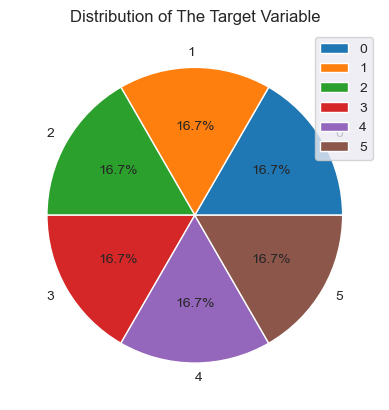

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute Magnitude(Mv)
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396
std,9552.425037,179432.244940,517.155763,10.532512
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000865,0.102750,-6.232500
50%,5776.000000,0.070500,0.762500,8.313000
75%,15055.500000,198050.000000,42.750000,13.697500
max,40000.000000,849420.000000,1948.500000,20.060000


In [94]:
# Visualizing the distribution of the target variable using a pie chart
plt.pie(df["Star Type"].value_counts(), labels=["0", "1", "2", "3", "4", "5"], autopct="%1.1f%%")

# Adding a legend for clarity
plt.legend()

# Setting a title for the plot
plt.title("Distribution of The Target Variable")

# Displaying the pie chart
plt.show()

# Generating relevant statistics for the dataset
df.describe()

Let's begin by visually exploring the dataset through a normalized bar plot, with a focus on the star type as our target variable. Consequently, we will depict all numerical attributes in relation to the star type itself, providing insight into their distribution. It is essential to acknowledge that the numeric values are normalized on a scale between 0 and 1. This normalization ensures visibility, considering the substantial differences in orders of magnitude among the represented values.

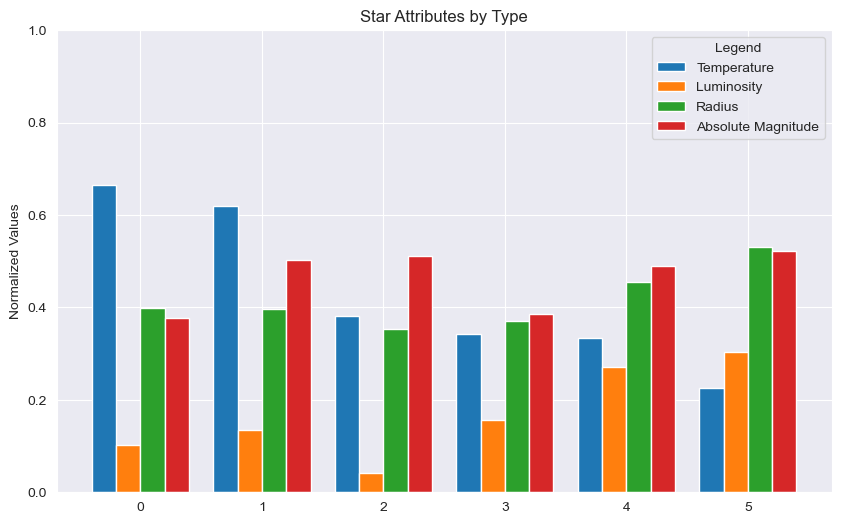

In [95]:
# Define a normalization function to scale a series between 0 and 1
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Extract unique star types from the "Star Type" column
starTypes = df["Star Type"].unique()

# Create a temporary DataFrame for normalization
temp_df = df.copy()

# Normalize selected attributes based on star type
temp_df["Temperature (K)"] = temp_df.groupby("Star Type")["Temperature (K)"].transform(normalize)
temp_df["Luminosity(L/Lo)"] = temp_df.groupby("Star Type")["Luminosity(L/Lo)"].transform(normalize)
temp_df["Radius(R/Ro)"] = temp_df.groupby("Star Type")["Radius(R/Ro)"].transform(normalize)
temp_df["Absolute Magnitude(Mv)"] = temp_df.groupby("Star Type")["Absolute Magnitude(Mv)"].transform(normalize)

# Calculate mean values for each normalized attribute grouped by star type
value_means = {
    "Temperature": temp_df.groupby("Star Type")["Temperature (K)"].mean(),
    "Luminosity": temp_df.groupby("Star Type")["Luminosity(L/Lo)"].mean(),
    "Radius": temp_df.groupby("Star Type")["Radius(R/Ro)"].mean(),
    "Absolute Magnitude": temp_df.groupby("Star Type")["Absolute Magnitude(Mv)"].mean()
}

# Plotting the normalized attributes by star type
x = np.arange(len(starTypes))
width = 0.2
multiplier = 0

fig, ax = plt.subplots(figsize=(10, 6))  

# Iterating through attribute means and plotting bar charts
for attribute, measurement in value_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Setting plot labels and formatting
ax.set_ylabel('Normalized Values')
ax.set_title('Star Attributes by Type')
ax.set_xticks(x + width * (multiplier - 1) / 2)
ax.set_xticklabels(starTypes)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

# Displaying the legend inside the plot for better aesthetics
plt.legend(loc='best', bbox_to_anchor=(1.0, 1.0), title='Legend')  

# Display the plot
plt.show()

Following some iterative experimentation, a scatter plot is employed to visually represent a pair of attributes exhibiting linear separability. Specifically, our investigation identifies "Temperature (K)" and "Absolute Magnitude (Mv)" as the optimal attributes for this purpose within the dataframe. The resultant plot  affirms that there is no necessity for remapping the existing attribute space to a new one, as the selected attributes already effectively capture the desired linear separation.

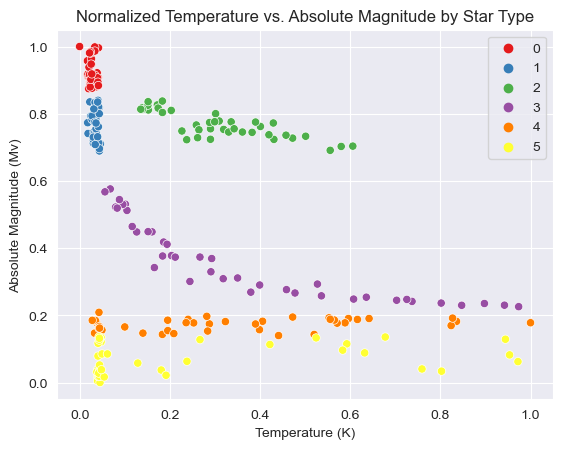

In [96]:
# Creating a scatter plot using Seaborn
ax = sns.scatterplot(
    x=df["Temperature (K)"].transform(normalize),
    y=df["Absolute Magnitude(Mv)"].transform(normalize),
    hue=df["Star Type"],
    palette="Set1"
)

# Setting labels for the x and y axes
ax.set(xlabel='Temperature (K)', ylabel='Absolute Magnitude (Mv)')

# Adding a title to the plot
plt.title('Normalized Temperature vs. Absolute Magnitude by Star Type')

# Adding a legend for better interpretation
ax.legend(loc='best')

# Displaying a grid on the plot for improved readability
ax.grid(True)

# Displaying the scatter plot
plt.show()

We then move on to the Principal Component Analysis stage, starting with Variance Analysis.

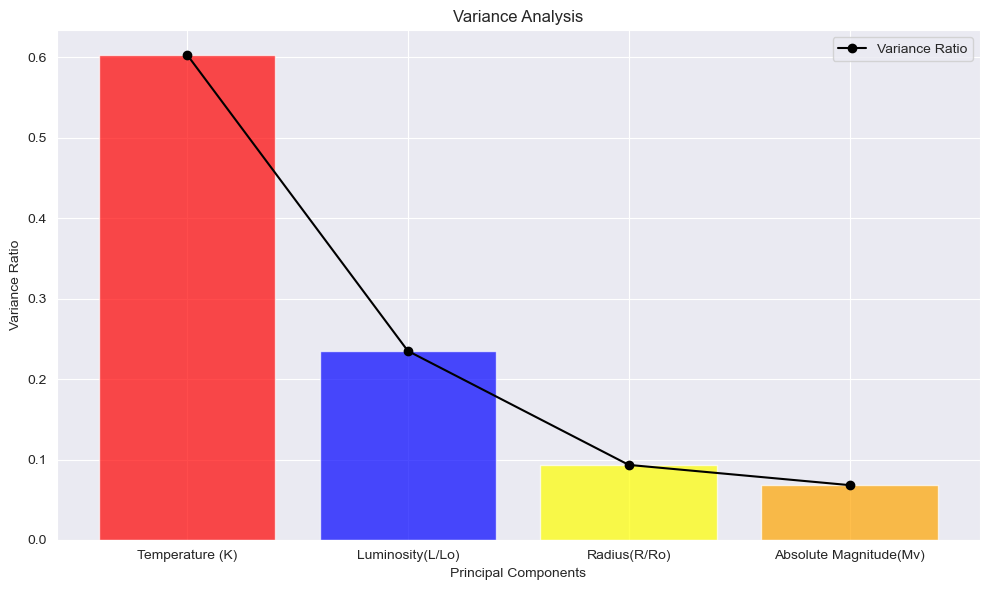

In [97]:
# Selecting attributes for analysis, assuming the first four columns of the DataFrame
attributes = list(df.columns[:4])

# Standardizing the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[attributes])

# Applying Principal Component Analysis (PCA) on the scaled data
pca = PCA().fit(scaled_data)

# Define a list of colors for the bars
colors = ['red', 'blue', 'yellow', 'orange']

# Plotting the explained variance ratios for each principal component as bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(attributes, pca.explained_variance_ratio_, color=colors, alpha=0.7)

# Plotting a line connecting the peaks
ax.plot(attributes, pca.explained_variance_ratio_, marker='o', color='black', label='Variance Ratio')

# Adding labels and title to the plot
plt.xlabel("Principal Components")
plt.ylabel("Variance Ratio")
plt.title("Variance Analysis")

# Adding legend
plt.legend()

# Adjusting layout to avoid label overlapping
plt.tight_layout()

# Displaying the plot
plt.show()

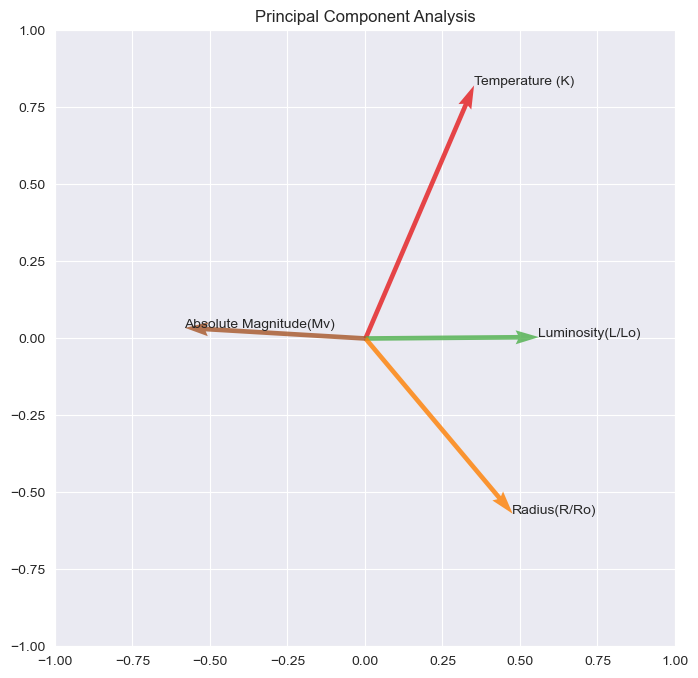

In [98]:
pcs = pca.components_

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # plot arrows from origin to (x, y)
    ax.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color=plt.cm.Set1(i/len(pcs[0])), alpha=0.8)

    # display the label of the point
    ax.text(x, y, df.columns[i], fontsize='10')

# Add labels and title
ax.set_title("Principal Component Analysis")

# Add grid
ax.grid(True)

# Displaying the plot
plt.show()

### Variance Analysis Considerations 
- **Temperature $(K)$:** a Variance Ratio of approximately $0.6$ indicates a moderate variance compared to the reference population. This may suggest that stellar temperatures in the dataset are relatively homogeneous, but there are still significant differences.
- **Luminosity $(L/Lo)$:** a Variance Ratio of approximately $0.2$ indicates lower variance compared to temperatures, but it is still present. The luminosities of stars in the dataset appear to be more homogeneous compared to temperatures.
- **Radius $(R/Ro)$:** a Variance Ratio of about $0.1$ suggests low variance compared to the reference population for stellar radius. This may indicate that the radius of stars in the dataset are relatively similar to each other.
- **Absolute Magnitude $(Mv)$:** a Variance Ratio of approximately $0.05$ indicates very low variance compared to the reference population for absolute magnitude. This suggests that absolute magnitudes of stars in the dataset are very similar to each other.

In light of these considerations, it is our judgment that a reduction in the dataset's dimensionality is unwarranted. The numeric attributes currently at our disposal demonstrate adequate descriptiveness and non-redundancy in portraying the characteristics of the target class. Consequently, a decision has been reached to avoid the implementation of principal component analysis in this instance.

## Creation of train and test sets
Let's begin by dividing the Dataset into two categories: train and test

In [99]:
# Reading the dataset into a Pandas DataFrame
stars_data = df.copy()

# Creating a new column 'target' and assigning it the values from the 'Star Type' column
stars_data['target'] = stars_data['Star Type']

# Displaying the first few rows of the DataFrame to inspect the data
stars_data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute Magnitude(Mv),Star Type,Star Color,Spectral Class,target
0,3068,0.002400,0.1700,16.12,0,RED,M,0
1,3042,0.000500,0.1542,16.60,0,RED,M,0
2,2600,0.000300,0.1020,18.70,0,RED,M,0
3,2800,0.000200,0.1600,16.65,0,RED,M,0
4,1939,0.000138,0.1030,20.06,0,RED,M,0


In [100]:
# Defining the feature columns for the dataset
feature_columns = ["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute Magnitude(Mv)"]

# Splitting the dataset into 70% training and 30% testing sets with specified feature columns and random seed
X_train, X_test, y_train, y_test = train_test_split(stars_data[feature_columns], stars_data["target"], test_size=0.3, random_state=42)
X_train

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute Magnitude(Mv)
29,7230,0.00008,0.0130,14.080
124,3511,0.00064,0.1090,17.120
75,3180,0.00100,0.3500,11.760
82,8930,0.00056,0.0095,13.780
5,2840,0.00065,0.1100,16.980
...,...,...,...,...
106,24630,363000.00000,63.0000,-5.830
14,2650,0.00060,0.1400,11.782
92,4077,0.08500,0.7950,6.228
179,24490,248490.00000,1134.5000,-8.240


Let's also standardize the features in the dataframe

In [101]:
# Creating an instance of the StandardScaler class
scaler = StandardScaler()

# Scaling the selected feature columns in the training set using the fit_transform method
X_train[feature_columns] = scaler.fit_transform(X_train[feature_columns])

# Scaling the selected feature columns in the test set using the transform method
X_test[feature_columns] = scaler.transform(X_test[feature_columns])

# Displaying descriptive statistics of the scaled training set
X_train.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute Magnitude(Mv)
count,1.680000e+02,1.680000e+02,1.680000e+02,1.680000e+02
mean,5.815454e-17,5.286776e-17,-4.229421e-17,2.114711e-17
std,1.002990e+00,1.002990e+00,1.002990e+00,1.002990e+00
min,-9.071270e-01,-6.054953e-01,-4.326185e-01,-1.592638e+00
25%,-7.453898e-01,-6.054953e-01,-4.324299e-01,-1.030413e+00
50%,-4.101059e-01,-6.054949e-01,-4.310897e-01,3.635968e-01
75%,4.271109e-01,5.800324e-01,-3.581328e-01,8.970099e-01
max,2.989489e+00,4.372002e+00,3.517527e+00,1.499360e+00


## First Approach: Decision Trees

Our decision to adopt a Decision Tree Model is driven by several reasons. Decision Trees excel in handling categorical data, which is prevalent in stellar datasets where attributes often fall into distinct classes. The ability of Decision Trees to handle such variables in a straightforward manner makes them particularly suitable for the diverse and discrete nature of the attributes in the analyzed dataset.

The simplicity of Decision Trees also provides an advantage in terms of computational efficiency, especially when compared to more complex models. This efficiency will become even more important when dealing with larger astronomical datasets that may be available in the future, as Decision Trees can deliver reliable results without the computational burden associated with more intricate models.

Furthermore, Decision Trees inherently address the issue of over-fitting by allowing for pruning, which helps prevent the model from becoming overly complex and capturing noise in the data. This characteristic ensures a more robust and generalized model, enhancing its performance on future data.

### Training the Decision Tree  
The following code block demonstrates the instantiation, training, and visualization of a Decision Tree Classifier. The model is created with a fixed random state `(random_state=42)` to ensure reproducibility of results. The Decision Tree is then fitted to the training data (`X_train`, `y_train`). The `plot_tree` function is employed to visualize the tree on the designated axis, with filled nodes for enhanced clarity.

In [102]:
# Create a copy of sets
X_train_tree, X_test_tree, y_train_tree, y_test_tree = X_train, X_test, y_train, y_test

# Instantiating a Decision Tree Classifier object with a fixed random state for reproducibility
tree = DecisionTreeClassifier(random_state=42)

# Fitting the Decision Tree model to the training data
tree.fit(X_train_tree, y_train_tree)

# Creating a figure and axis for plotting the decision tree structure with specified dimensions
fig, ax = plt.subplots(figsize=(150, 100))

# Plotting the decision tree structure on the designated axis with filled nodes for enhanced visualization
plot_tree(tree, filled=True, ax=ax)

# Displaying the plot
plt.show()

### Confusion Matrix
In the following block, we compute a confusion matrix by comparing the actual labels (`y_test`) with the predicted labels (`y_pred`). The confusion matrix is subsequently displayed to assess the classification model's performance. Finally, the code calculates and prints the accuracy of the model by dividing the sum of correctly predicted instances (diagonal elements of the confusion matrix) by the total number of instances.


In [103]:
# Perform prediction using the trained machine learning model on the test data
y_pred_tree = tree.predict(X_test_tree)

# Compute the confusion matrix by comparing the true labels (y_test) with the predicted labels (y_pred)
confusion_matrix_tree = confusion_matrix(y_test_tree, y_pred_tree)

# Display the confusion matrix to evaluate the performance of the classification model
print("Confusion matrix:\n", confusion_matrix_tree)

# Calculate and print the accuracy of the model using the diagonal sum of the confusion matrix
accuracy_tree = confusion_matrix_tree.diagonal().sum() / confusion_matrix_tree.sum()
print("\nAccuracy:", f'{accuracy_tree*100:.2f}%')

Confusion matrix:
 [[14  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0 15]]

Accuracy: 100.00%


## Second Approach: Neural Networks
Our decision to employ a Neural Network Model for stellar classification is motivated by several factors. First of all, the capability of neural networks allows them to autonomously recognize patterns in data, a crucial aspect when dealing with the structures present in stellar datasets. Furthermore, the adaptability of neural networks to diverse data types proves advantageous in handling the variability of attributes present in the dataset. We believe the model can recognize patterns more accurately compared to simpler models.

One of the most relevant features is the generalization capability of a well-trained neural network, that will enable accurate predictions for stars not present in the training set, provided they share similarities with the training dataset. This may prove its usefulness, as astronomical data constantly expands over time. Moreover, the scalability of neural models with increased data volume further enhances their performance, making them particularly advantageous when access to larger datasets becomes available. In other words, if more data becomes available in the future, given a similar formatting, the model will still be able to both improve and maintain a good level of precision.

### Implementation of One-Hot Encoded Format for Standardized Categorical Representation in Neural Network Training
The code block below serves the purpose of converting class labels into categorical format. In this particular context, the Keras library is employed for its ease in implementing neural networks, while the Scikit-learn library is reserved for basic machine learning models. The Keras utility function `to_categorical` is utilized for transforming class labels into a one-hot encoded representation. This encoding ensures a standardized format for categorical data, especially beneficial for neural network training. Each class label is mapped to a one-hot vector. This transformation is essential in the context of machine learning, specifically for tasks involving classification, as it facilitates effective model interpretation and learning.

In [104]:
# Create a copy of sets and convert the training/testing labels (y) to categorical format using the keras.utils.to_categorical function
X_train_neural, X_test_neural, y_train_neural, y_test_neural = X_train, X_test, keras.utils.to_categorical(y_train), keras.utils.to_categorical(y_test)

The next code block is dedicated to the creation and configuration of a neural network model using the Keras library. Initially, a Sequential object representing the model is instantiated. The model is constructed by adding dense (fully connected) layers with specific configurations. The first densely connected layer has 3 units and uses the Rectified Linear Unit (ReLU) activation function. This layer receives an input of size 4, as specified by the `input_shape` parameter. The second densely connected layer has 6 units and utilizes the softmax activation function. Softmax is commonly employed in the last layer of a neural network for multiclass classification problems, converting the output into a probability distribution across multiple classes. Subsequently, the model is compiled with specific configurations. The loss function is set to `categorical_crossentropy`, suitable for multiclass classification problems. The Adam optimizer is chosen to update the network weights, and the evaluation metric is accuracy, measuring the percentage of correct predictions.

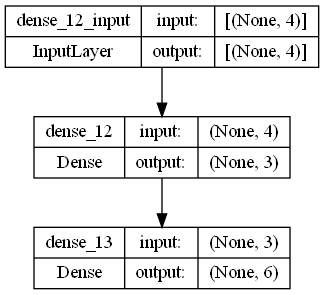

In [105]:
# Creating a sequential model object
neural_network = Sequential()

# Adding a dense layer with 3 units and ReLU activation
neural_network.add(Dense(3, input_shape=(4,), activation='relu'))

# Adding another dense layer with 6 units and softmax activation
neural_network.add(Dense(6, activation='softmax'))

# Compiling the model with categorical cross-entropy loss, Adam optimizer, and accuracy metric
neural_network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Visualizing the model architecture with plot_model function from Keras utils
keras.utils.plot_model(neural_network, show_shapes=True)

The following is the actual training of the neural network model on the dataset, and the subsequent performance evaluation conducted through the Test Loss and Test Accuracy values. For purely aesthetic purposes, TensorFlow's Callback was employed to display training progress in a single line, as opposed to an extended format, which would have occupied a significant portion of the notebook without providing additional value. In this format, the number of epochs used to train the model is reported, followed by the model's accuracy values.

In [106]:
class CompactProgbar(Callback):
    """
    Custom callback for displaying a compact progress bar and selected metrics during training.

    Parameters:
    - display_metrics (list): List of metrics to display in the progress bar. Default is ['loss', 'accuracy'].

    Usage:
    1. Create an instance of CompactProgbar.
    2. Pass the instance as a callback during model training using neural_network.fit().

    Example:
    ```python
    # Create the CompactProgbar callback
    compact_progbar = CompactProgbar()

    # Train the model with the CompactProgbar callback
    neural_network.fit(X_train_neural, y_train_neural, epochs=200, batch_size=5, verbose=0, validation_data=(X_test_neural, y_test_neural), callbacks=[compact_progbar])

    # Evaluate the model on the test set
    score = neural_network.evaluate(X_test_neural, y_test_neural, verbose=0)
    print('\nTest Loss:', score[0])
    print('Test Accuracy:', score[1])
    ```
    """

    def __init__(self, display_metrics=['loss', 'accuracy']):
        """
        Constructor for CompactProgbar callback.

        Parameters:
        - display_metrics (list): List of metrics to display in the progress bar.
        """
        super().__init__()
        self.display_metrics = display_metrics

    def on_epoch_end(self, epoch, logs=None):
        """
        Method called at the end of each epoch.

        Parameters:
        - epoch (int): Current epoch number.
        - logs (dict): Dictionary containing the epoch's metrics.

        Output:
        - Prints a compact progress bar with selected metrics for the current epoch.
        """
        logs = logs or {}
        metrics_str = " - ".join([f"{key}: {logs[key]:.4f}" for key in self.display_metrics])
        print(f"\rEpoch {epoch + 1}/{self.params['epochs']} - {metrics_str}", end='')

# Creation of the CompactProgbar callback
compact_progbar = CompactProgbar()

# Training the model with the CompactProgbar callback
neural_network.fit(X_train_neural, y_train_neural, epochs=500, batch_size=5, verbose=0, callbacks=[compact_progbar])

# Evaluation of the model on the test set
score = neural_network.evaluate(X_test_neural, y_test_neural, verbose=0)
print('\nTest Loss:', f'{score[0]*100:.2f}%')
print('Test Accuracy:', f'{score[1]*100:.2f}%')

Epoch 500/500 - loss: 0.2773 - accuracy: 0.8393
Test Loss: 28.59%
Test Accuracy: 79.17%


## Third Approach: Clustering
The choice to utilize a Clustering Model for the classification of stars has a multitude of reasons. Clustering models excel in identifying visual structures within datasets, making them particularly useful at separating the dataset's features. The application of clustering models also offers advantages in scenarios where the dataset continually evolves, as is the case with expanding astronomical data.
 
By categorizing stars based on shared characteristics, the clustering model is equipped to make accurate predictions for stars not explicitly present in the training set but sharing commonalities with those within the dataset. As the volume of astronomical data grows, the clustering model can easily incorporate new data points into existing clusters. 

### Clustering Analysis 
In the following code block, the purpose is to use the elbow method to identify the ideal k value to use for the classifier. The range of values for the number of clusters (K) is defined from 5 to 20, and the algorithm's inertia is evaluated for each value of K. The dataset features considered for clustering are "Absolute Magnitude(Mv)," "Radius(R/Ro)," and "Temperature (K)," extracted from both the training and test datasets. This is due to the fact that testing with "Luminosity(L/Lo)" also lowered the performance of the classifier due to the distribution of its values. The K-Means clustering is instantiated and fitted to the training data for each K value, with a specified random state and 10 initializations. The inertia, a measure of the within-cluster sum of squared distances, is recorded for each K, and the results are plotted in the "Inertia vs Number of Clusters" graph. This analysis provides insights into the optimal number of clusters for the given dataset, aiding in the interpretation of potential patterns or groupings within the data.


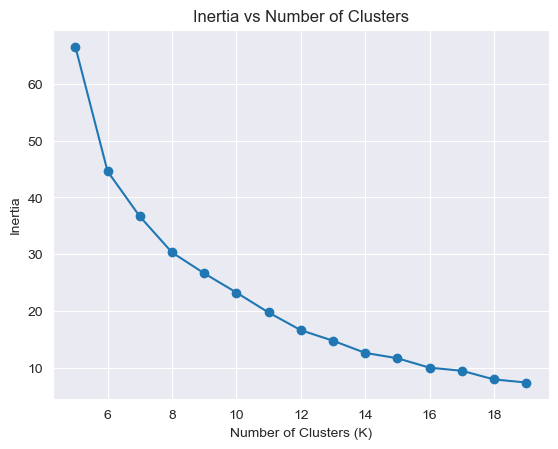

In [107]:
# Create a copy of sets and selecting relevant features for clustering from the training and test datasets
X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = X_train[["Absolute Magnitude(Mv)", "Radius(R/Ro)", "Temperature (K)"]], X_test[["Absolute Magnitude(Mv)", "Radius(R/Ro)", "Temperature (K)"]], y_train, y_test

# Defining the range of values for K (number of clusters)
k_values = range(5, 20)
inertiae = []

# Iterating over different values of K to evaluate the inertia
for k in k_values:
    # Initializing KMeans clustering with specified parameters
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)

    # Fitting the model to the training data
    kmeans.fit(X_train_cluster)
    
    # Appending the inertia for the current K value to the list
    inertiae.append(kmeans.inertia_)

# Plotting the Inertia vs Number of clusters graph
plt.plot(k_values, inertiae, '-o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.show()

Not being able to identify a k value using the elbow method, we decided to carry out the silhouette analysis.

For k =  5 The average silhouette_score is : 0.5765512062478422
For k =  6 The average silhouette_score is : 0.587953401717588
For k =  7 The average silhouette_score is : 0.5829870257071497
For k =  8 The average silhouette_score is : 0.5872704110159249
For k =  9 The average silhouette_score is : 0.5189081179886774
For k =  10 The average silhouette_score is : 0.5197469567186598
For k =  11 The average silhouette_score is : 0.5322780683728461
For k =  12 The average silhouette_score is : 0.559418357836949
For k =  13 The average silhouette_score is : 0.5337822439329367
For k =  14 The average silhouette_score is : 0.5732572246144058
For k =  15 The average silhouette_score is : 0.5672944265175284
For k =  16 The average silhouette_score is : 0.570260621022678
For k =  17 The average silhouette_score is : 0.5539284105300792
For k =  18 The average silhouette_score is : 0.5564400425511438
For k =  19 The average silhouette_score is : 0.5441719093629924
For k =  6  the average silhouett

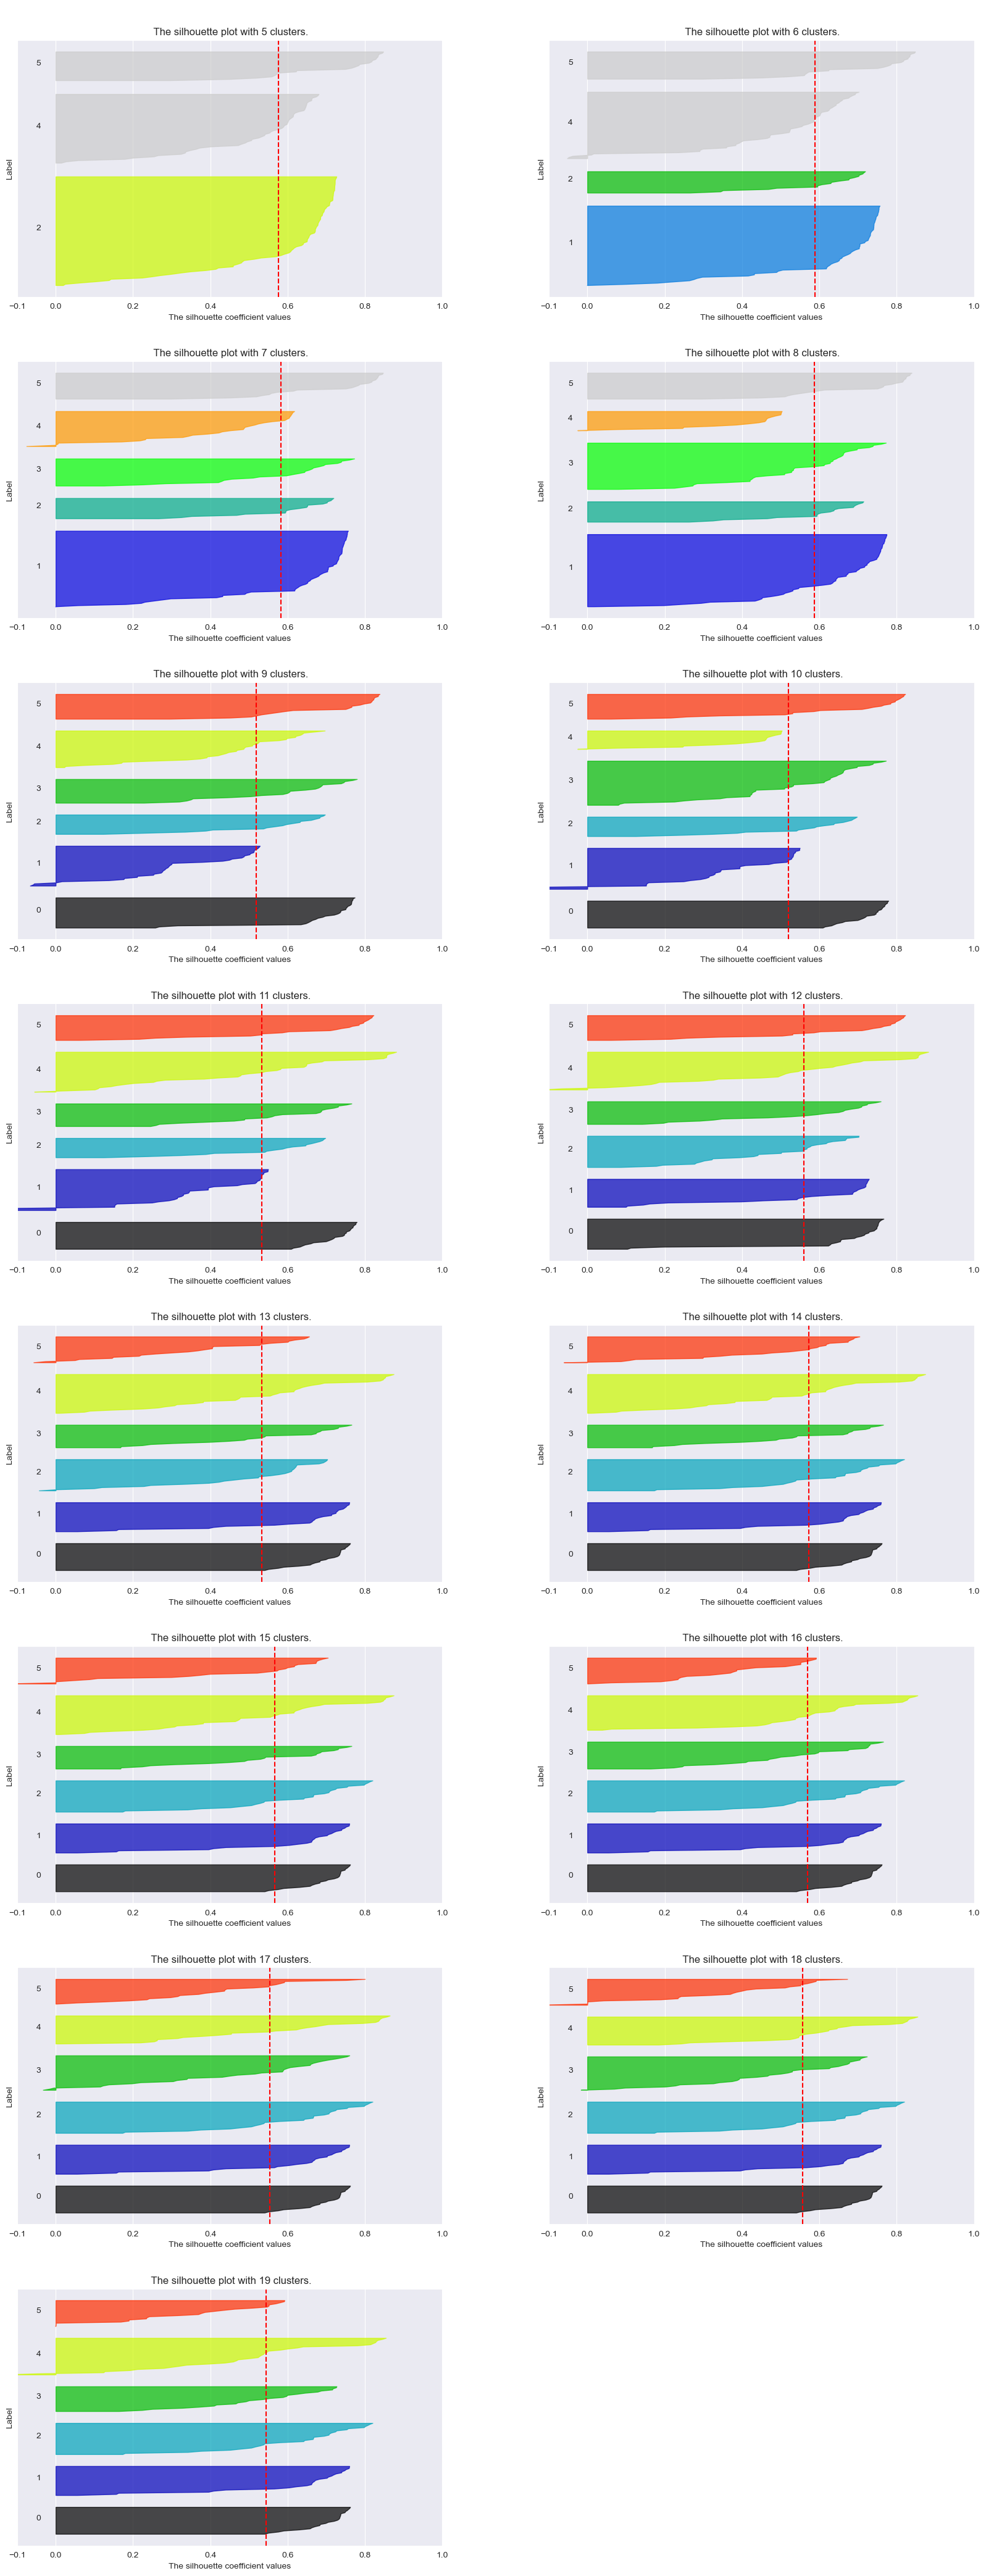

In [108]:
fig = plt.figure(figsize=(20, 100))
sub = 1

silhouette_max = 0
k_silhouette_max = 0

for k in k_values:

    ax = fig.add_subplot(math.floor(len(k_values)), 2, sub)
    
    ax.set_xlim([-0.1, 1])
    #ax.set_ylim([0, len(X_train_cluster) + (k + 1) * 10])
    
    # Initializing KMeans clustering with specified parameters
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)

    # Fitting the model to the training data
    y_kmeans = kmeans.fit_predict(X_train_cluster)
    
    cluster_labels = kmeans.labels_

    # Assign cluster labels generated by k-means clustering algorithm to the variable 'labels'
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    # Identify the indices of the closest points to the cluster centers using pairwise_distances_argmin_min function
    closest_points_indices, _ = pairwise_distances_argmin_min(centers, X_train_cluster)

    # Create a dictionary 'label_cluster' to associate cluster indices with corresponding class labels
    label_cluster = {}
    for i in range(len(closest_points_indices)):
        label_cluster.update({i: list(y_train_cluster)[closest_points_indices[i]]})

    # Mapping predicted cluster labels to corresponding class labels
    new_cluster_labels = [label_cluster.get(y) for y in labels]
    new_cluster_labels = np.array(new_cluster_labels)
    
    silhouette_avg = silhouette_score(X_train_cluster, cluster_labels)
    print("For k = ", k, "The average silhouette_score is :", silhouette_avg)

    if silhouette_avg > silhouette_max:
        silhouette_max = silhouette_avg
        k_silhouette_max = k
        
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train_cluster, cluster_labels)
    
    values = list(set(label_cluster.values()))
    
    y_lower = 10
    for i in values:
        ith_cluster_silhouette_values = sample_silhouette_values[new_cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        
        y_upper = y_lower + size_cluster_i
        
        color = matcm.nipy_spectral(float(i) / len(values))
        
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("\n\n The silhouette plot with " + str(k) + " clusters.")
    
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    sub += 1

print("For k = ", k_silhouette_max, " the average silhouette_score is at its best:", silhouette_max)

plt.subplots_adjust(hspace=0.25, wspace=0.25)
plt.show()

In this case it is not advisable to use the k value with a larger average silhouette. Analyzing the graphs we chose k = 16 as it is the only one in which all the groups have a peak in addition to the red line, it does not present negative values and the widths of the various groups are almost homogeneous

### Exploratory Data Analysis

The following code segment employs the K-Means clustering algorithm to analyze a dataset with three features: Absolute Magnitude (Mv), Radius (R/Ro), and Temperature (K). The number of clusters, denoted as 'n', is set to 16, for the criteria indicated above. The K-Means algorithm is initialized with specified parameters, including the number of clusters and random state for reproducibility. The model is then fitted to the training data, and cluster labels are predicted for each data point. The cluster centers are extracted, and we generate a 3D plot using Matplotlib.

The plot provides insights into the distribution of data points in the three-dimensional feature space, with each point colored according to its assigned cluster. Additionally, the cluster centers are visualized as "grey-ish" spheres, allowing for a clear representation of the cluster centroids. The index of each cluster center is annotated for reference. 

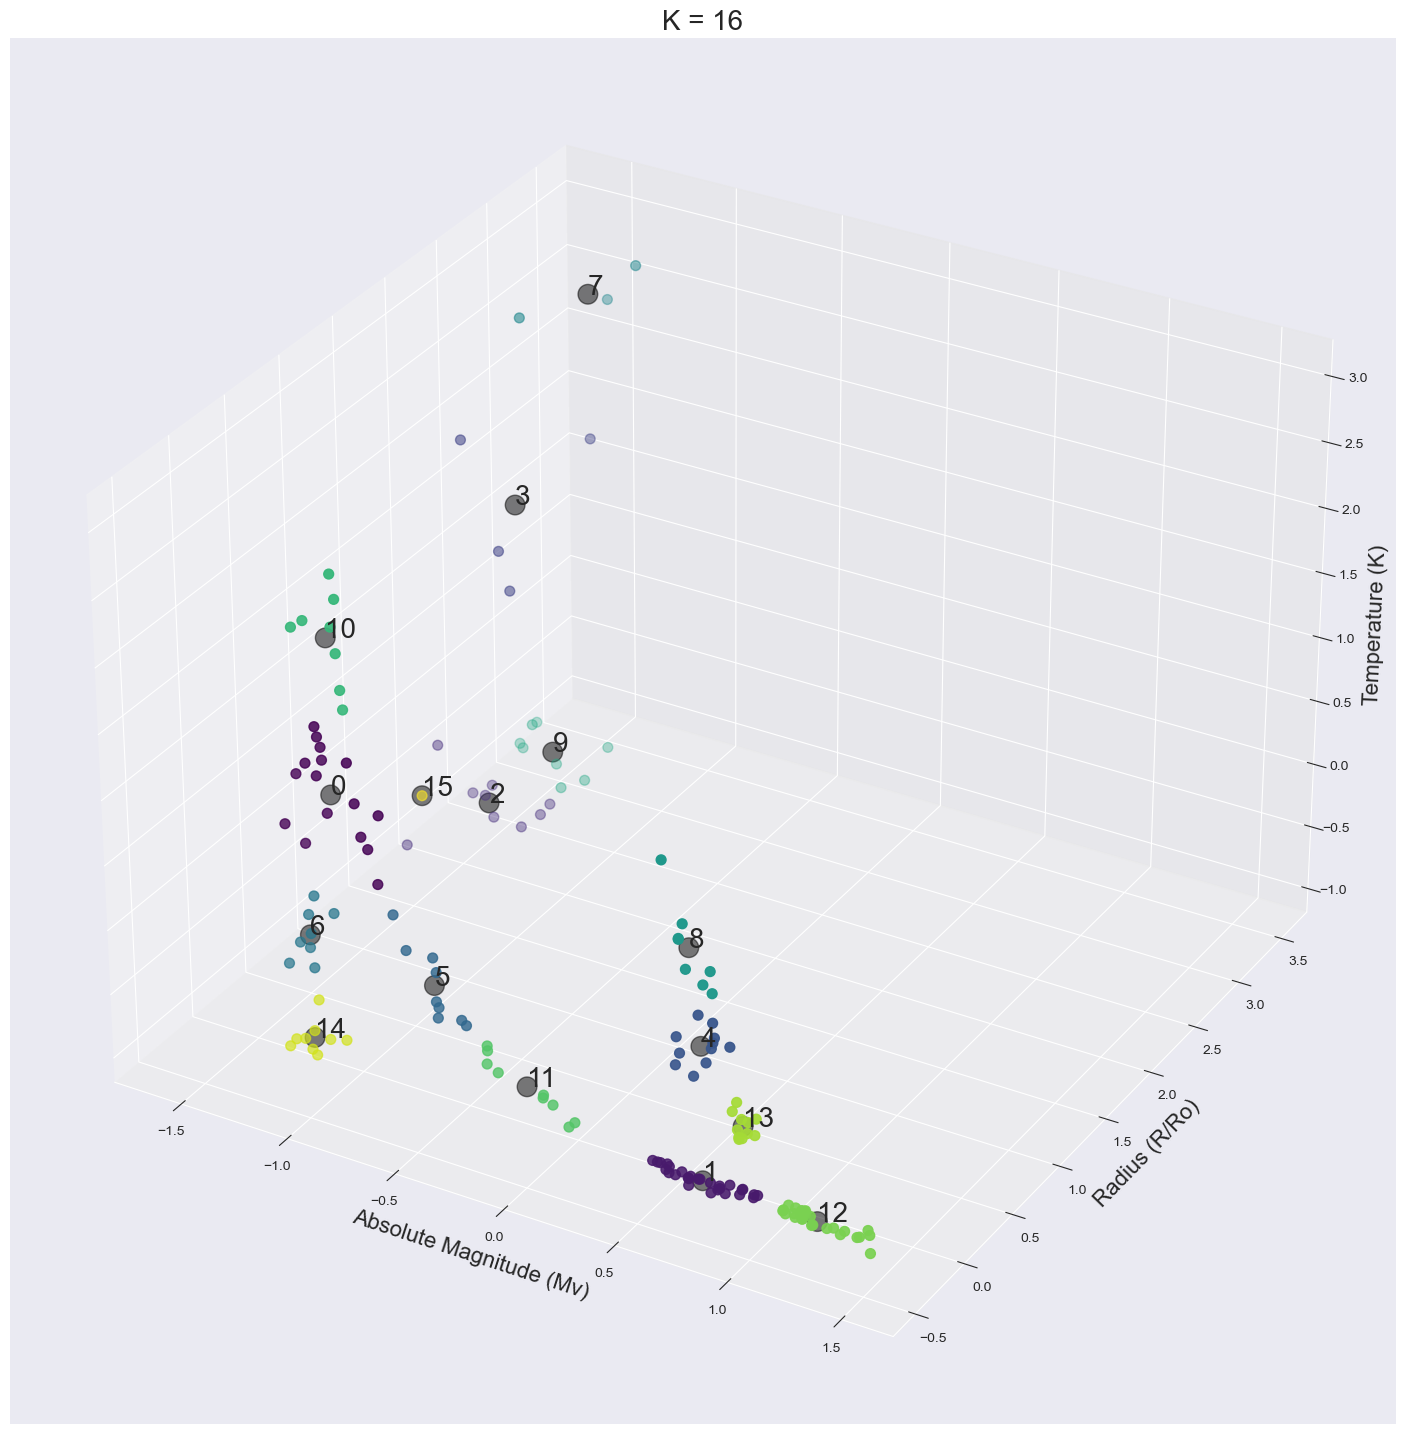

In [109]:
# Set the number of clusters
n = 16

# Initialize KMeans with specified parameters
kmeans = KMeans(n_clusters=n, random_state=0, n_init=10)

# Fit the model and predict cluster labels for the training data
y_kmeans = kmeans.fit_predict(X_train_cluster)

# Retrieve cluster centers
centers = kmeans.cluster_centers_

# Create a 3D plot
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(projection='3d')

# Set plot title and axis labels
ax.set_title("K = " + str(n), fontsize=20)
ax.set_xlabel("Absolute Magnitude (Mv)", fontsize=16)
ax.set_ylabel("Radius (R/Ro)", fontsize=16)
ax.set_zlabel("Temperature (K)", fontsize=16)

# Scatter plot the training data points colored by their cluster labels
ax.scatter(X_train["Absolute Magnitude(Mv)"].values, X_train["Radius(R/Ro)"].values, X_train["Temperature (K)"].values, c=y_kmeans, s=50, cmap='viridis')

# Scatter plot the cluster centers
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

# Annotate the cluster centers with their index
i = 0
for x, y, z in zip(centers[:, 0], centers[:, 1], centers[:, 2]):
    ax.text(x, y, z, i, fontsize=20)
    i += 1

# Display the 3D plot
plt.show()

### Dissimilarity Matrix
In the following code snippet, pairwise distances between data points in the training set are computed using the `pairwise_distances` function. The resulting dissimilarity matrix is visualized using a heatmap with the `sns.heatmap` function from the Seaborn library, employing the 'viridis' color map for representation. This visualization method offers a concise and informative representation of the dissimilarity relationships within the dataset, helping in the identification of patterns or clusters among the data points.


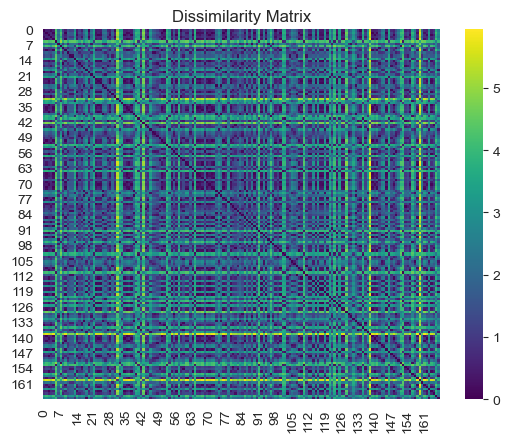

In [110]:
# Compute pairwise distances between data points in the training set
distances = pairwise_distances(X_train_cluster)

# Visualize the dissimilarity matrix using a heatmap
sns.heatmap(distances, cmap='viridis')

# Set the title of the heatmap to reflect its purpose
plt.title('Dissimilarity Matrix')

# Display the heatmap
plt.show()

### Label Cluster
The following code demonstrates the post-processing steps following the application of the k-means clustering algorithm. The cluster labels, obtained from the `kmeans.labels_` attribute, are stored in the variable `labels`. Subsequently, the code utilizes the `pairwise_distances_argmin_min` function to identify the indices of the closest points to the cluster centers. These indices are then used to create a dictionary named `label_cluster`, associating each cluster index with the corresponding class label. The resulting label-cluster association dictionary is displayed as `label_cluster`. This approach facilitates the interpretation of the clustering results by establishing a link between cluster indices and the actual class labels of the data points.


In [111]:
# Assign cluster labels generated by k-means clustering algorithm to the variable 'labels'
labels = kmeans.labels_

# Identify the indices of the closest points to the cluster centers using pairwise_distances_argmin_min function
closest_points_indices, _ = pairwise_distances_argmin_min(centers, X_train_cluster)

# Create a dictionary 'label_cluster' to associate cluster indices with corresponding class labels
label_cluster = {}
for i in range(len(closest_points_indices)):
    label_cluster.update({i: list(y_train_cluster)[closest_points_indices[i]]})

# Display the resulting label-cluster association dictionary
label_cluster

{0: 4,
 1: 1,
 2: 5,
 3: 5,
 4: 2,
 5: 3,
 6: 4,
 7: 5,
 8: 2,
 9: 5,
 10: 3,
 11: 3,
 12: 0,
 13: 2,
 14: 4,
 15: 5}

### Confusion Matrix
Now, K-Means clustering is employed to make predictions on the test data (`X_test_cluster`). The predicted cluster labels are then mapped to their corresponding class labels using a mapping dictionary (`label_cluster`). Subsequently, a confusion matrix is calculated by comparing the true labels (`y_test_cluster`) with the predicted labels. Finally, the confusion matrix is displayed, offering insights into the model's performance in terms of classification. Additionally, the accuracy of the clustering model is computed and printed, providing a quantitative measure of the model's overall correctness in predicting the class labels. 


In [112]:
# Performing predictions using the KMeans clustering model on the test data
y_pred = kmeans.predict(X_test_cluster)

# Mapping predicted cluster labels to corresponding class labels
y_pred_cluster = [label_cluster.get(y) for y in y_pred]

# Calculating the confusion matrix based on true and predicted labels
confusion_matrix_clustering = confusion_matrix(y_test_cluster, y_pred_cluster)

# Displaying the confusion matrix
print("Confusion matrix:\n", confusion_matrix_clustering)

# Calculating and printing the accuracy of the clustering model
accuracy_clustering = confusion_matrix_clustering.diagonal().sum() / confusion_matrix_clustering.sum()
print("\nAccuracy:", f'{accuracy_clustering*100:.2f}%')

Confusion matrix:
 [[14  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0  8  2  0]
 [ 0  0  0  2  9  0]
 [ 0  0  0  0  0 15]]

Accuracy: 94.44%


## Model Evaluation

Let's calculate the basic parameters for the decision tree model

In [113]:
# Generate a classification report to evaluate the performance of the decision tree model
# The classification report provides a comprehensive summary of various metrics such as precision, recall, and F1-score for each class
print(classification_report(y_pred_tree, y_test_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        15

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72


Let's calculate the basic parameters for the neural network model

In [114]:
# Perform prediction using the trained neural network on the test data
y_pred_neural = neural_network.predict(X_test_neural)

# Generate a classification report to evaluate the performance of the neural network model
# The classification report provides a comprehensive summary of various metrics such as precision, recall, and F1-score for each class
print(classification_report(np.argmax(y_pred_neural, axis=1), np.argmax(y_test_neural, axis=1)))

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00        12
           2       1.00      0.42      0.59        24
           3       0.90      1.00      0.95         9
           4       1.00      0.92      0.96        12
           5       1.00      1.00      1.00        15

    accuracy                           0.79        72
   macro avg       0.82      0.72      0.75        72
weighted avg       0.99      0.79      0.85        72


C:\Users\Filippo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Filippo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Filippo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Let's calculate the basic parameters for the k-means algorithm

In [115]:
# Generate a classification report to evaluate the performance of the k-means algorithm
# The classification report provides a comprehensive summary of various metrics such as precision, recall, and F1-score for each class
print(classification_report(y_pred_cluster, y_test_cluster))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10
           3       0.80      0.80      0.80        10
           4       0.82      0.82      0.82        11
           5       1.00      1.00      1.00        15

    accuracy                           0.94        72
   macro avg       0.94      0.94      0.94        72
weighted avg       0.94      0.94      0.94        72


Having considered the precision of the various models, in order to evaluate them further, we chose to analyze the training times

In [116]:
# Train the decision tree and calculate the training time
start_time_tree = time()

tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train_tree, y_train_tree)

end_time_tree = time()
tree_training_time = end_time_tree - start_time_tree

# Train the neural network and calculate the training time
start_time_neural = time()

neural = keras.models.Sequential()
neural.add(keras.layers.Dense(3, input_shape=(4,), activation='relu'))
neural.add(keras.layers.Dense(6, activation='softmax'))
neural.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
neural.fit(X_train_neural, y_train_neural, epochs=500, batch_size=5, verbose=0, callbacks=[compact_progbar])

end_time_neural = time()
neural_training_time = end_time_neural - start_time_neural

# Train the k-means and calculate the training time
start_time_cluster = time()

cluster = KMeans(n_clusters=n, random_state=0, n_init=10)
cluster.fit(X_train_cluster)

end_time_cluster = time()
cluster_training_time = end_time_cluster - start_time_cluster

# Print the results
print("\n")
print(f'Training time for Decision Tree: {tree_training_time:.2f} seconds')
print(f'Training time for Neural Network: {neural_training_time:.2f} seconds')
print(f'Training time for K-Means: {cluster_training_time:.2f} seconds')

Epoch 500/500 - loss: 0.0573 - accuracy: 0.9940

Training time for Decision Tree: 0.01 seconds
Training time for Neural Network: 44.13 seconds
Training time for K-Means: 0.68 seconds


By analyzing the main parameters and training times, the best model among those analyzed is the decision tree: it provides fast and accurate results and can easily accommodate future data